<center>
<hr>
<h1>INF-477. Redes Neuronales Artificiales.</h1>
<h2>Tarea 2 - Autoencoders, RBMs y ConvNets</h2>
<hr>
</center>

<div style="width:25%; display: inline-block"></div>
<div style="width:25%; display: inline-block">
    <b>Juan Carlos Garcés Bernt</b><br>
    jcgarces@alumnos.inf.utfsm.cl
</div>
<div style="width:25%; display: inline-block;">
    <b>Natalia Gonzalez</b><br>
    natalia.gonzalezg@usm.cl
</div>
<div style="width:25%; display: inline-block"></div>


a) Cargue los datos de entrenamiento y pruebas. Empiece trabajando con el conjunto de entrenamiento más pequeño ("train_32x32.mat"). Determine el tamaño de las imágenes, el número de clases posibles y el número de ejemplos en cada categoría. Finalmente, visualice 5 imágenes de entrenamiento y 5 de test (elegidas aleatoriamente). Comente.

El numero de clases es  10  etiquetadas por:  [0 1 2 3 4 5 6 7 8 9]
En el train set:
Hay  13861  ejemplos de la clase  0
Hay  10585  ejemplos de la clase  1
Hay  8497  ejemplos de la clase  2
Hay  7458  ejemplos de la clase  3
Hay  6882  ejemplos de la clase  4
Hay  5727  ejemplos de la clase  5
Hay  5595  ejemplos de la clase  6
Hay  5045  ejemplos de la clase  7
Hay  4659  ejemplos de la clase  8
Hay  4948  ejemplos de la clase  9
Hay  73257  imagenes en total 
En el test set:
Hay  5099  ejemplos de la clase  0
Hay  4149  ejemplos de la clase  1
Hay  2882  ejemplos de la clase  2
Hay  2523  ejemplos de la clase  3
Hay  2384  ejemplos de la clase  4
Hay  1977  ejemplos de la clase  5
Hay  2019  ejemplos de la clase  6
Hay  1660  ejemplos de la clase  7
Hay  1595  ejemplos de la clase  8
Hay  1744  ejemplos de la clase  9
Hay  26032  imagenes en total 
Tamano imagen:  (32, 32)
Imagenes del train set


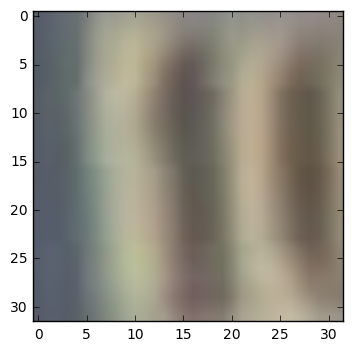

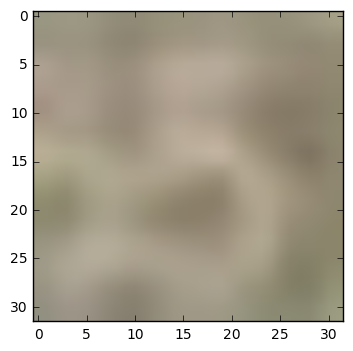

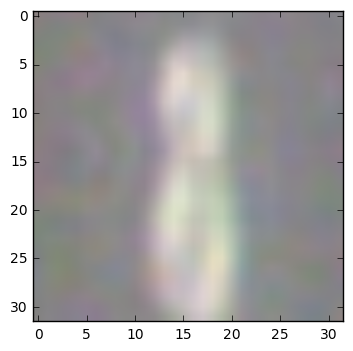

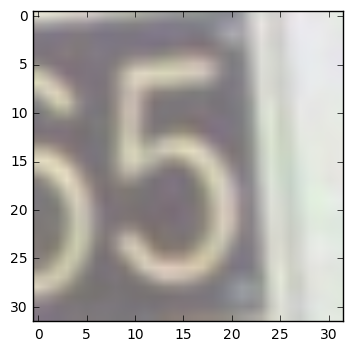

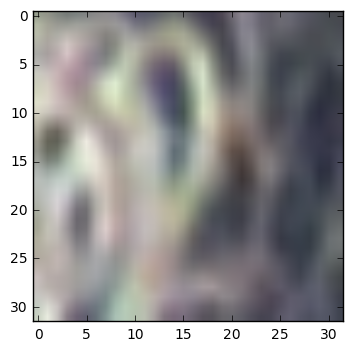

Imagenes del test set


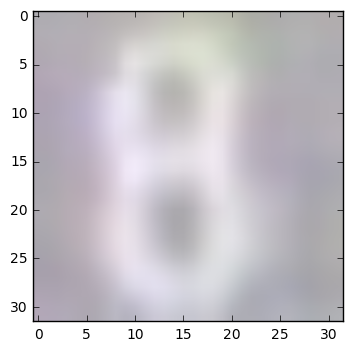

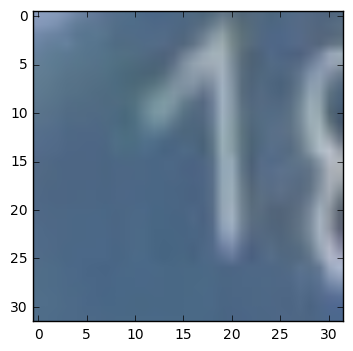

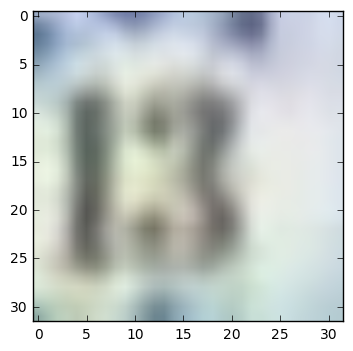

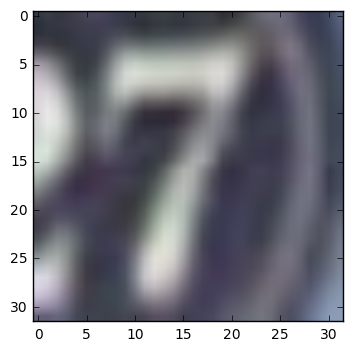

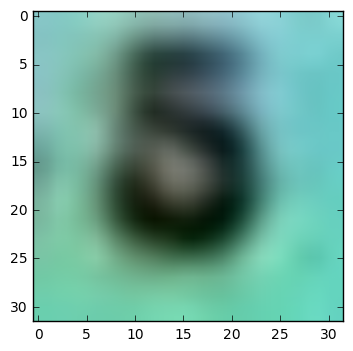

In [1]:
%matplotlib inline
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt
from random import randint

#Cargando datos de entrenamiento y de prueba (son diccionarios con seccion 'y' y 'X')
train_data = sio.loadmat('train_32x32.mat')
test_data = sio.loadmat('test_32x32.mat')
X_train = train_data['X'].T
y_train = train_data['y'] - 1
X_test = test_data['X'].T
y_test = test_data['y'] - 1
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
n_classes = len(np.unique(y_train))

print ("El numero de clases es ",n_classes, " etiquetadas por: ",np.unique(y_train))
print ("En el train set:")
cont = np.zeros(10)
for i in y_train:
    cont[i] += 1
for i in range(0,10):
    print ("Hay ", int(cont[i])," ejemplos de la clase ",i )
print ("Hay ", len(y_train)," imagenes en total ")

print ("En el test set:")
cont = np.zeros(10)
for i in y_test:
    cont[i] += 1
for i in range(0,10):
    print ("Hay ", int(cont[i])," ejemplos de la clase ",i )
print ("Hay ", len(y_test)," imagenes en total ")

print ("Tamano imagen: ",X_train[0][0].shape)

print ("Imagenes del train set")
for i in range(0,5):
    j = randint(0,len(X_train))
    plt.imshow(X_train[j].T)
    plt.show()

print ("Imagenes del test set")
for i in range(0,5):
    j = randint(0,len(X_test))
    plt.imshow(X_test[j].T)
    plt.show()


Notamos que el numero de etiquetas corresponde a cada uno de los dígitos en las fotos. Las imágenes tienen una mala calidad en general, como se puede ver en la imagenes mostradas del train y test set, lo que dificulta la identificación del número. Viene en formato RGB de 32x32.

b) Normalice las imágenes de entrenamiento y pruebas, dividiendo las intensidades originales de pixel en cada canal por 255. Represente adecuadamente la salida de la red de modo de tener un vector de tamaño igual al número de clases.

In [2]:
from keras.utils import np_utils
# Normalizacion
X_train /= 255
X_test /= 255
# Vectorizacion del output
Y_train = np_utils.to_categorical(y_train, n_classes)
Y_test = np_utils.to_categorical(y_test, n_classes)


Using Theano backend.


c) Defina una CNN con 2 niveles convolucionales (cada una de ellas seguida de una capa de pooling) y 2 capas MLP clásicas completamente conectadas (una oculta y una de salida). Para la primera capa convolucional utilice 16 filtros de $5 \times 5$ y para la segunda 512 filtros de $7\times 7$. Para la capa MLP escondida use 20 neuronas (ésta arquitectura, con algunas diferencias, fue una de las primeras CNNs entrenadas sobre SVHN y consiguió una accuracy de 94.28%). Genere un esquema lo más compacto posible que muestre los cambios de forma (dimensionalidad) que experimenta un patrón de entrada a medida que se ejecuta un forward-pass.

In [3]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D, AveragePooling2D

def CNN(cf_size_l1=5,cf_size_l2=7,cp_size_l1=2,cp_size_l2=2,n_filters_l1=16,n_filters_l2=512):
    model = Sequential()

    # Niveles convolucionales
    model.add(
                Convolution2D(n_filters_l1,
                              cf_size_l1 ,
                              cf_size_l1, 
                              border_mode='same', 
                              activation='relu', 
                              input_shape=(3, 32, 32)
                             )
    )
    model.add(MaxPooling2D(pool_size=(cp_size_l1,cp_size_l1)))

    model.add(Convolution2D(n_filters_l2, cf_size_l2,cf_size_l2 , border_mode='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(cp_size_l2, cp_size_l2)))
    model.add(Flatten())

    # Capas MLP
    model.add(Dense(20, activation='relu'))
    model.add(Dense(n_classes, activation='softmax'))
    model.summary()
    return model

model = CNN()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
convolution2d_1 (Convolution2D)  (None, 16, 32, 32)    1216        convolution2d_input_1[0][0]      
____________________________________________________________________________________________________
maxpooling2d_1 (MaxPooling2D)    (None, 16, 16, 16)    0           convolution2d_1[0][0]            
____________________________________________________________________________________________________
convolution2d_2 (Convolution2D)  (None, 512, 16, 16)   401920      maxpooling2d_1[0][0]             
____________________________________________________________________________________________________
maxpooling2d_2 (MaxPooling2D)    (None, 512, 8, 8)     0           convolution2d_2[0][0]            
___________________________________________________________________________________________

En el cuadro anterior podemos ver los cambios de dimensionalidad que afectan a un input, el cual tiene dimensión inicial de $(3,32,32)$ y dimension final de $(10,)$.

d) Entrene la red anterior un máximo de 12 epochs. ¿Logra mejorar o al menos igualar el resultado reportado en la literatura? Si no alcanzó el desempeño mencionado, o sólo por diversión, proponga modificaciones a los criterios de entrenamiento y/o cambios arquitectónicos menores (por ejemplo, aumento del número de neuronas de la última capa escondida). 

In [4]:
from keras.optimizers import SGD, Adadelta, Adagrad

adagrad = Adagrad()

model.compile(loss='binary_crossentropy', optimizer=adagrad, metrics=['accuracy'])
model.fit(X_train, Y_train, batch_size=1280, nb_epoch=12, verbose=1,validation_data=(X_test, Y_test))

Train on 73257 samples, validate on 26032 samples
Epoch 1/12
73257/73257 [==============================] - 472s - loss: 0.4019 - acc: 0.8975 - val_loss: 0.3181 - val_acc: 0.9000
Epoch 2/12
73257/73257 [==============================] - 470s - loss: 0.3177 - acc: 0.9000 - val_loss: 0.3183 - val_acc: 0.9000
Epoch 3/12
73257/73257 [==============================] - 470s - loss: 0.3041 - acc: 0.9013 - val_loss: 0.2861 - val_acc: 0.9055
Epoch 4/12
73257/73257 [==============================] - 469s - loss: 0.2651 - acc: 0.9099 - val_loss: 0.2312 - val_acc: 0.9184
Epoch 5/12
73257/73257 [==============================] - 467s - loss: 0.2096 - acc: 0.9242 - val_loss: 0.1893 - val_acc: 0.9282
Epoch 6/12
73257/73257 [==============================] - 467s - loss: 0.1677 - acc: 0.9381 - val_loss: 0.1569 - val_acc: 0.9420
Epoch 7/12
73257/73257 [==============================] - 466s - loss: 0.1435 - acc: 0.9479 - val_loss: 0.1380 - val_acc: 0.9500
Epoch 8/12
73257/73257 [=======================

e) Evalúe el efecto de modificar el tamaño de los filtros de las capas convolucionales (y pooling) sobre los tiempos de entrenamiento y el desempeño de la red, transcurridas 10 epochs. Para simplificar, considere el mismo tamaño para todas las capas convolucionales (y el mismo tamaño para todas las capas de pooling). Por ejemplo, puede considerar los casos $3 \times 3$, $5 \times 5$, $7 \times 7$ y $9 \times 9$ para las capas convolusionales y $2 \times 2$ y $4 \times 4$ para pooling. Estudie además los cambios de forma que experimenta un patrón de entrada a medida que se ejecuta un forward-pass. 

In [5]:
import time

CF = [3,5,7,9]
CP = [2,4]

for i in CF:
    for j in CP:
        print ("Capas de Pooling:", j,"x",j)
        print ("Capas de convolusionales:", i,"x",i)
        model = CNN(cf_size_l1=i,cf_size_l2=i ,cp_size_l1=j,cp_size_l2=j)
        start_time = time.time()
        model.compile(loss='binary_crossentropy', optimizer=adagrad, metrics=['accuracy'])
        model.fit(X_train, Y_train, batch_size=1280, nb_epoch=10, verbose=1,validation_data=(X_test, Y_test))
        elapsed_time = time.time() - start_time
        score = model.evaluate(X_test, Y_test, verbose=0)
        print ("Test loss:", score[0])
        print ("Test accuracy:", score[1])
        print ("Time:", elapsed_time)

Capas de Pooling: 2 x 2
Capas de convolusionales: 3 x 3
____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
convolution2d_3 (Convolution2D)  (None, 16, 32, 32)    448         convolution2d_input_2[0][0]      
____________________________________________________________________________________________________
maxpooling2d_3 (MaxPooling2D)    (None, 16, 16, 16)    0           convolution2d_3[0][0]            
____________________________________________________________________________________________________
convolution2d_4 (Convolution2D)  (None, 512, 16, 16)   74240       maxpooling2d_3[0][0]             
____________________________________________________________________________________________________
maxpooling2d_4 (MaxPooling2D)    (None, 512, 8, 8)     0           convolution2d_4[0][0]            
___________________________________

f) Evalúe el efecto de modificar el número de filtros para las capas convolucionales sobre los tiempos de entrenamiento y el desempeño de la red, transcurridas 10 epochs. Para simplificar, puede considerar el mismo tamaño para todas las capas convolucionales.

In [6]:
L1 = [32,64,128]
L2 = [64,128,256]

for i in L1:
    for j in L2:
        model = CNN(n_filters_l1=i,n_filters_l2=j)
        start_time = time.time()
        model.compile(loss='binary_crossentropy', optimizer=adagrad, metrics=['accuracy'])
        model.fit(X_train, Y_train, batch_size=1280, nb_epoch=10, verbose=1,validation_data=(X_test, Y_test))
        elapsed_time = time.time() - start_time
        score = model.evaluate(X_test, Y_test, verbose=0)
        print ("Test loss:", score[0])
        print ("Test accuracy:", score[1])
        print ("Time:", elapsed_time)


____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
convolution2d_19 (Convolution2D) (None, 32, 32, 32)    2432        convolution2d_input_10[0][0]     
____________________________________________________________________________________________________
maxpooling2d_19 (MaxPooling2D)   (None, 32, 16, 16)    0           convolution2d_19[0][0]           
____________________________________________________________________________________________________
convolution2d_20 (Convolution2D) (None, 64, 16, 16)    100416      maxpooling2d_19[0][0]            
____________________________________________________________________________________________________
maxpooling2d_20 (MaxPooling2D)   (None, 64, 8, 8)      0           convolution2d_20[0][0]           
___________________________________________________________________________________________

g) Se ha sugerido que la práctica bastante común de continuar una capa convolucional con una capa de pooling puede generar una reducción prematura de las dimensiones del patrón de entrada. Evalúe el efecto de modificar la arquitectura que hemos venido utilizando, re-definiendo un “nivel convolucional” como 2 capas de filtros convolucionales seguidas de una capa de pooling. ¿Se mejora significativamente el resultado? ¿Se observa un aprendizaje más lento en este caso? ¿Observa overfitting?

In [7]:
model = Sequential()
model.add(Convolution2D(32, 3, 3,border_mode='same',activation='relu',input_shape=(3,32,32)))
model.add(Convolution2D(32, 3, 3,activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Convolution2D(256, 3, 3, border_mode='same', activation='relu'))
model.add(Convolution2D(256, 3, 3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(20, activation='relu'))
model.add(Dense(n_classes, activation='softmax'))

start_time = time.time()
model.compile(loss='binary_crossentropy', optimizer=adagrad, metrics=['accuracy'])
model.fit(X_train, Y_train, batch_size=1280, nb_epoch=10, verbose=1,validation_data=(X_test, Y_test))
elapsed_time = time.time() - start_time
score = model.evaluate(X_test, Y_test, verbose=0)
print ("Test loss:", score[0])
print ("Test accuracy:", score[1])
print ("Time:", elapsed_time)

Train on 73257 samples, validate on 26032 samples
Epoch 1/10
73257/73257 [==============================] - 627s - loss: 0.3636 - acc: 0.8974 - val_loss: 0.3168 - val_acc: 0.9000
Epoch 2/10
73257/73257 [==============================] - 629s - loss: 0.3171 - acc: 0.9000 - val_loss: 0.3100 - val_acc: 0.9000
Epoch 3/10
73257/73257 [==============================] - 631s - loss: 0.3071 - acc: 0.8999 - val_loss: 0.2865 - val_acc: 0.9001
Epoch 4/10
73257/73257 [==============================] - 630s - loss: 0.2762 - acc: 0.9065 - val_loss: 0.2798 - val_acc: 0.9052
Epoch 5/10
73257/73257 [==============================] - 630s - loss: 0.2373 - acc: 0.9215 - val_loss: 0.2370 - val_acc: 0.9196
Epoch 6/10
73257/73257 [==============================] - 632s - loss: 0.2106 - acc: 0.9302 - val_loss: 0.1987 - val_acc: 0.9340
Epoch 7/10
73257/73257 [==============================] - 633s - loss: 0.1884 - acc: 0.9346 - val_loss: 0.1883 - val_acc: 0.9370
Epoch 8/10
73257/73257 [=======================

h) Elija una de las redes entrenadas (preferentemente una con buen desempeño) y visualice los pesos correspondientes a los filtros de la primera capa convolucional. Visualice además el efecto del filtro sobre algunas imágenes de entrenamiento. Comente.

i) Evalúe la conveniencia de regularizar el entrenamiento de la red anterior mediante $Dropout$.

In [8]:
model = Sequential()
model.add(Convolution2D(32, 3, 3,border_mode='same',activation='relu',input_shape=(3,32,32)))
model.add(Convolution2D(32, 3, 3,activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Convolution2D(256, 3, 3, border_mode='same', activation='relu'))
model.add(Convolution2D(256, 3, 3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(20, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(n_classes, activation='softmax'))

sgd = SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True)

model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])
model.fit(X_train, Y_train, batch_size=1280, nb_epoch=20, verbose=1,validation_data=(X_test, Y_test))
score = model.evaluate(X_test, Y_test, verbose=0)
print ("Test loss:", score[0])
print ("Test accuracy:", score[1])

Train on 73257 samples, validate on 26032 samples
Epoch 1/20
73257/73257 [==============================] - 673s - loss: 0.3208 - acc: 0.9000 - val_loss: 0.3176 - val_acc: 0.9000
Epoch 2/20
73257/73257 [==============================] - 673s - loss: 0.3185 - acc: 0.9000 - val_loss: 0.3166 - val_acc: 0.9000
Epoch 3/20
73257/73257 [==============================] - 676s - loss: 0.3178 - acc: 0.9000 - val_loss: 0.3159 - val_acc: 0.9000
Epoch 4/20
73257/73257 [==============================] - 682s - loss: 0.3169 - acc: 0.9000 - val_loss: 0.3143 - val_acc: 0.9000
Epoch 5/20
73257/73257 [==============================] - 672s - loss: 0.3132 - acc: 0.9001 - val_loss: 0.3038 - val_acc: 0.9009
Epoch 6/20
73257/73257 [==============================] - 670s - loss: 0.2974 - acc: 0.9026 - val_loss: 0.2710 - val_acc: 0.9068
Epoch 7/20
73257/73257 [==============================] - 670s - loss: 0.2696 - acc: 0.9079 - val_loss: 0.2309 - val_acc: 0.9190
Epoch 8/20
73257/73257 [=======================

j) Evalúe la conveniencia de utilizar todo el dataset (“extra 32x32.mat”) en el entrenamiento de la red en $f)$ ó $d)$.

Mi computador explotó.

In [9]:
from theano import function, config, shared, sandbox
import theano.tensor as T
import numpy
import time

vlen = 10 * 30 * 768  # 10 x #cores x # threads per core
iters = 1000

rng = numpy.random.RandomState(22)
x = shared(numpy.asarray(rng.rand(vlen), config.floatX))
f = function([], T.exp(x))
print(f.maker.fgraph.toposort())
t0 = time.time()
for i in range(iters):
    r = f()
t1 = time.time()
print("Looping %d times took %f seconds" % (iters, t1 - t0))
print("Result is %s" % (r,))
if numpy.any([isinstance(x.op, T.Elemwise) for x in f.maker.fgraph.toposort()]):
    print('Used the cpu')
else:
    print('Used the gpu')

[Elemwise{exp,no_inplace}(<TensorType(float32, vector)>)]
Looping 1000 times took 1.655107 seconds
Result is [ 1.23178029  1.61879337  1.52278066 ...,  2.20771813  2.29967761
  1.62323284]
Used the cpu
